In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten,Dropout, BatchNormalization, LeakyReLU
from keras.models import Sequential, clone_model
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from sklearn.utils import resample
from keras.optimizers import Adam 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
  # load dataset
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

In [3]:
print(y_test[0])

9


In [4]:
print(y_test)

[9 2 1 ... 8 1 5]


In [5]:
print(f'Test: X={X_test.shape}, y={y_test.shape}')
print(f'Train: X={X_train.shape}, y={y_train.shape}')

Test: X=(10000, 28, 28), y=(10000,)
Train: X=(60000, 28, 28), y=(60000,)


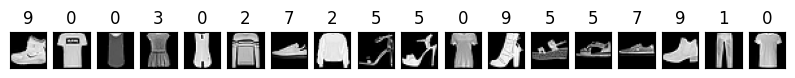

In [6]:
# Display some images
fig, axes = plt.subplots(ncols=18, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(18):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

0: T-shirt/top
1:Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot
Each image is 28 pixels in height and 28 pixels in width


In [7]:
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)
print(f'sample1={y_test[0]}')#Here may be problematic 

sample1=[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test= X_test.reshape((X_test.shape[0], 28, 28, 1))#---No need for that we use flatten layer
print(f'Test: X={X_test.shape}, y={y_test.shape}')
print(f'Train: X={X_train.shape}, y={y_train.shape}') 

Test: X=(10000, 28, 28, 1), y=(10000, 10)
Train: X=(60000, 28, 28, 1), y=(60000, 10)


In [9]:
def new_data(train_data,test_data,training_data_size,test_data_size,number_set):
    (x_train, y_train), (x_test, y_test) = train_data, test_data
    new_train_x,new_train_y=[],[]
    new_test_x,new_test_y=[],[]
    for i in range(number_set):
        x_1, y_1 = resample(x_train, y_train, n_samples=training_data_size)
        new_train_x.append(x_1)
        new_train_y.append(y_1)
        x_2, y_2 = resample(x_test, y_test, n_samples=test_data_size)
        new_test_x.append(x_2)
        new_test_y.append(y_2)
    return (new_train_x,new_train_y), (new_test_x,new_test_y)


In [10]:
# For the target model data
target_train_data=(X_train[:50000], y_train[:50000])
target_test_data=(X_test[:4000], y_test[:4000])
target_train_data, target_test_data=new_data(target_train_data,target_test_data,50000,4000,1)
(x_l,y_l)=target_test_data
np.save('y_l.npy', y_l)
loaded_y_l = np.load('y_l.npy')
with open('y_l.txt', 'w') as f:
    for i, item in enumerate(loaded_y_l):  # Use enumerate to get both index and item
        one_hot_vector_string = ", ".join(map(str, item)) # Use item, not y_l[i]
        output_line = f"Sample {i+1}: One-hot vector = [{one_hot_vector_string}]\n"
        f.write(output_line)

In [11]:
import re
def count_elements_in_brackets(filepath):
    try:
        with open(filepath, 'r') as file:
            lines = file.readlines()

            if len(lines) != 1: 
                return -1

            string = lines[0].strip()

    except FileNotFoundError:
        return -1
    elements = re.findall(r'\[([^\]]*)\]', string)
    if not elements:
        return 0 
    count = 0
    for element_group in elements:
        count += len(element_group.split(','))  
    return count
    """Counts the number of elements within square brackets in a string read from a file.

    Args:
        filepath: The path to the text file containing the string.

    Returns:
        The number of elements found within square brackets, or -1 if the file 
        does not exist or contains more than one line.  Returns 0 if no brackets are found.
    """

In [12]:
filepath = "y_l.txt"
element_count = count_elements_in_brackets(filepath)
if element_count == -1:
    print("Error: File not found or contains multiple lines.")
else:
    print(f"Number of elements within brackets: {element_count}")

Number of elements within brackets: 4000


In [13]:
# For the Shadow Models train and test data
shadow_train_data=(X_train[50000:], y_train[50000:])
shadow_test_data=(X_test[4000:], y_test[4000:])
shadow_train_data, shadow_test_data=new_data(shadow_train_data,shadow_test_data,3000,1000,2)#shadow model=6
(x_m,y_m)=shadow_test_data
np.save('y_m.npy', y_m)
loaded_y_m = np.load('y_m.npy')
with open('y_m.txt', 'w') as f:
    for i, item in enumerate(loaded_y_m):  # Use enumerate to get both index and item
        one_hot_vector_string = ", ".join(map(str, item)) # Use item, not y_l[i]
        output_line = f"Sample {i+1}: One-hot vector = [{one_hot_vector_string}]\n"
        f.write(output_line)

In [14]:
np.save('y_m[0].npy', y_m[0])
loaded_y_m[0] = np.load('y_m[0].npy')
with open('y_m[0].txt', 'w') as f:
    for i, item in enumerate(loaded_y_m[0]):  # Use enumerate to get both index and item
        one_hot_vector_string = ", ".join(map(str, item)) # Use item, not y_l[i]
        output_line = f"Sample {i+1}: One-hot vector = [{one_hot_vector_string}]\n"
        f.write(output_line)

In [15]:
def fashion_model():
    model1 = Sequential()
    model1.add(Flatten(input_shape=(28,28)))
    model1.add(Dense(128, activation='relu'))
    model1.add(Dense(10, activation='softmax'))
    model1.summary()
    return model1
traget_model = fashion_model()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-12-27 05:40:36.145043: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
(x_traintr, y_traintr),(x_testtr, y_testtr)=target_train_data, target_test_data

In [17]:
traget_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
traget_model.fit(x_traintr, y_traintr,epochs=100,batch_size=32)

Epoch 1/100


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6372 - loss: 10.6512
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6884 - loss: 0.8770
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7153 - loss: 0.7507
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7351 - loss: 0.6690
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7456 - loss: 0.6162
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7526 - loss: 0.6045
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7598 - loss: 0.5885
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7756 - loss: 0.5655
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7901 - loss: 0.5453
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8026 - loss: 0.5142
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8043 - loss: 0.5120
Epoch 12/100
1563/1563 ━━━━━━━

In [18]:
#traget_model.save('target_model.keras')
#traget_model = keras.models.load_model('target_model.keras')

In [19]:
traget_model.save_weights('traget_model_weights.weights.h5')
#target_model.load_weights('traget_model_weights.h5')      #model_new.load_weights('my_model_weights.h5')

In [20]:
predictions = traget_model.predict(x_testtr)
print(predictions)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.7454423e-13]
 [5.1952395e-16 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.9999512e-02 4.6432670e-04 1.3289239e-01 ... 2.7884219e-03
  9.8110968e-03 2.3836626e-05]
 ...
 [9.6048623e-01 9.5126263e-05 2.8308048e-05 ... 0.0000000e+00
  1.9636907e-15 0.0000000e+00]
 [1.9999512e-02 4.6432670e-04 1.3289239e-01 ... 2.7884219e-03
  9.8110968e-03 2.3836626e-05]
 [1.3023973e-02 1.3213197e-03 7.6579399e-02 ... 1.3713976e-14
  1.6442154e-02 1.1752304e-15]]


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


In [21]:
print(len(x_testtr[0][1]))

28


In [22]:
# (x_traintr, y_traintr),(x_testtr, y_testtr)=target_train_data, target_test_data
# #Train Data
# x_att, y_att= resample(x_traintr[0], y_traintr[0], n_samples=10000)
# print(x_att[0].shape) 
# x_data=[] 
# single_image = np.expand_dims(x_att[0], axis=0)
# print(single_image.shape)
# predictionsl = traget_model.predict(single_image)
# print(predictionsl[0])
# x_data.append(max(traget_model.predict(x_att[5:6])[0]))
# x_data.append(np.argmax(traget_model.predict(x_att[5:6])[0]))
# x_data.append(max(traget_model.predict(x_att[6:7])[0]))
# x_data.append(np.argmax(traget_model.predict(x_att[6:7])[0]))
# x_data.append(max(traget_model.predict(x_att[7:8])[0]))
# x_data.append(np.argmax(traget_model.predict(x_att[7:8])[0]))
# x_data.append(max(traget_model.predict(x_att[8:9])[0]))
# x_data.append(np.argmax(traget_model.predict(x_att[8:9])[0]))
# x_data.append(max(traget_model.predict(x_att[9:10])[0]))
# x_data.append(np.argmax(traget_model.predict(x_att[9:10])[0]))
# y=(traget_model.predict(x_att[9:10]))
# print(y[0])
# print(y)
# x_data.append(y[0][2])
# print(y_att[0])
# index=np.argmax(y_att[0],axis=0)
# print(index)
# print(x_data)

In [23]:
y_test_original = np.argmax(y_testtr[0], axis=1)
print(y_test_original)
predictions = np.argmax(predictions, axis = 1)
print(predictions)
accuracy = accuracy_score(y_test_original, predictions)
print(f"Accuracy: {accuracy}")

[7 1 4 ... 0 6 3]
[7 1 4 ... 0 4 4]
Accuracy: 0.7955


In [24]:
#test Data for attack_model
attack_x,attack_y=[[] for i in range(10)], [[] for i in range(10)]
(x_traintr, y_traintr),(x_testtr, y_testtr)=target_train_data, target_test_data
#Train Data of traget model
x_att, y_att= resample(x_traintr[0], y_traintr[0], n_samples=2000)
print(len(y_traintr[0]))
for j in range(len(y_att)):
    index=np.argmax(y_att[j], axis=0)
    l1=traget_model.predict(x_att[j:j+1])
    attack_x[index].append(l1[0])#Becaues it takes only batch data
    attack_y[index].append(1)
#Test Data of traget model
x_att1, y_att1= resample(x_testtr[0], y_testtr[0], n_samples=1000)
print(len(y_testtr[0]))
for j in range(len(y_att1)):
    index=np.argmax(y_att1[j], axis=0)
    l2=traget_model.predict(x_att1[j:j+1])
    attack_x[index].append(l2[0])#Becaues it takes only batch data
    attack_y[index].append(0)

50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [25]:
print(len(y_testtr[0]))

4000


In [26]:
# Padding (Example - pad with zeros)
max_len = max(len(sublist) for sublist in attack_x)
for i in range(10):
    padding = [[0.0] * len(attack_x[0][0])] * (max_len - len(attack_x[i]))  # Pad with zeros to match max length
    attack_x[i].extend(padding)
    attack_y[i].extend([0] * (max_len - len(attack_y[i])))



# Flatten the lists (important for sklearn)
attack_x = np.array(attack_x).reshape(10*max_len, -1)  # Reshape for sklearn compatibility
attack_y = np.array(attack_y).flatten()
attack_data = (attack_x, attack_y)

In [27]:
np.savez_compressed('attack_data.npz', attack_x=attack_x, attack_y=attack_y)  # Compressed .npz
# loaded_data = np.load('attack_data.npz')
# attack_x_loaded = loaded_data['attack_x']
# attack_y_loaded = loaded_data['attack_y']

In [28]:
# joblib.dump(attack_data, 'attack_data.joblib')
# loaded_attack_data = joblib.load('attack_data.joblib')
# attack_x_loaded, attack_y_loaded = loaded_attack_data

In [29]:
def svm_model(train_data, test_data, verbose=False):  
    (x_train, y_train), (x_test, y_test) = train_data, test_data

    model = SVC(gamma='scale', kernel='linear', verbose=verbose)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print('SVM model score : ', score)
    return model

In [30]:
# model = svm_model(attack_data, attack_data, verbose=True)

In [23]:
#how many shadow models creates:
def shadow_models(no_models,model):
    shadow_models=[]
    for i in  range(no_models):
        shadow_models.append(clone_model(model))
    return shadow_models

In [32]:
    # attack_x, attack_y = [], []
    # predictions = model.predict(dataset[0][0], batch_size=batch_size)
    # attack_x.append(predictions)
    # attack_y.append(np.ones(len(dataset[0][0])))

In [33]:
list_shadow_models=shadow_models(2,traget_model)
print(len(list_shadow_models))
# for i in range(5):
#     list_shadow_models[i].summary()
print(len(shadow_train_data))
print(len(shadow_test_data))

2
2
2


In [24]:
#One things about in there We want "IN" data and "OUt" data for which is for finding the accuracy of the test model and train the test model   
def training_models(models,train_data,test_data,epochs, batch_size):
    (X_train_sets, y_train_sets), (X_test_set, y_test_set)=train_data,test_data
    
    for i in range(len(models)):
        x_train = X_train_sets[i]
        y_train = y_train_sets[i]
        x_test=X_test_set[i]
        y_test=y_test_set[i]
        models[i].compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
        models[i].fit(x_train, y_train,epochs=epochs,batch_size=batch_size,verbose=0)   
        accuracy_score= models[i].evaluate(x_test, y_test, verbose=0)
        print(i,accuracy_score[1])  
    return models

In [35]:
show_mod=training_models(list_shadow_models,shadow_train_data,shadow_test_data,100,32)

0 0.7990000247955322
1 0.7419999837875366


In [36]:
for i in range(len(show_mod)):
    show_mod[i].save_weights('show_mod[i]_weights.weights.h5')
    #show_mod[i].load_weights('show_mod[i]_weights.weights.h5') 

In [43]:
import joblib
def svm_model(train_data, test_data, verbose=False):  
    (x_train, y_train), (x_test, y_test) = train_data, test_data

    model = SVC(gamma='scale', kernel='linear', verbose=verbose)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print('SVM model score : ', score)
    joblib.dump(model, 'svm_model.joblib')
    return model

In [38]:
#train Data for attack_model
tr_attack_x,tr_attack_y=[[] for i in range(10)], [[] for i in range(10)]
(x_traintr, y_traintr),(x_testtr, y_testtr)=shadow_train_data,shadow_test_data
#Train Data of shadow  model
for i in range(len(list_shadow_models)):
    x_att, y_att= resample(x_traintr[i], y_traintr[i], n_samples=3000)
    print(len(y_traintr[0]))
    for j in range(len(y_att)):
        index=np.argmax(y_att[j], axis=0)
        l1=list_shadow_models[i].predict(x_att[j:j+1])
        tr_attack_x[index].append(l1[0])#Becaues it takes only batch data
        tr_attack_y[index].append(1)
    #Test Data of shadow model
    x_att1, y_att1= resample(x_testtr[i], y_testtr[i], n_samples=1000)
    print(len(y_testtr[0]))
    for j in range(len(y_att1)):
        index=np.argmax(y_att1[j], axis=0)
        l2=list_shadow_models[i].predict(x_att1[j:j+1])
        tr_attack_x[index].append(l2[0])#Becaues it takes only batch data
        tr_attack_y[index].append(0)

3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [39]:
max_len = max(len(sublist) for sublist in tr_attack_x)
for i in range(10):
    padding = [[0.0] * len(tr_attack_x[0][0])] * (max_len - len(tr_attack_x[i]))  # Pad with zeros to match max length
    tr_attack_x[i].extend(padding)
    tr_attack_y[i].extend([0] * (max_len - len(tr_attack_y[i])))



# Flatten the lists (important for sklearn)
tr_attack_x = np.array(tr_attack_x).reshape(10*max_len, -1)  # Reshape for sklearn compatibility
tr_attack_y = np.array(tr_attack_y).flatten()
tr_attack_data = (tr_attack_x, tr_attack_y)

In [40]:
np.savez_compressed('tr_attack_data.npz', tr_attack_x=tr_attack_x, tr_attack_y=tr_attack_y)  # Compressed .npz
# loaded_data = np.load('tr_attack_data.npz')
# tr_attack_x_loaded = loaded_data['tr_attack_x']
# tr_attack_y_loaded = loaded_data['tr_attack_y']

In [44]:
model = svm_model(tr_attack_data, attack_data, verbose=True)

[LibSVM].

.
*
optimization finished, #iter = 2421
obj = -4020.000077, rho = -0.999447
nSV = 4052, nBSV = 4029
Total nSV = 4052
SVM model score :  0.6865203761755486


In [ ]:
loaded_model = joblib.load('svm_model.joblib')
#predictions = loaded_model.predict(new_data)

In [52]:
def attack_model():
    model1 = Sequential()
    # model1.add(Flatten(input_shape=(28,28)))
    model1.add(Dense(64, activation='relu',input_shape=(tr_attack_x_loaded.shape[1],)))
    model1.add(Dropout(0.2))
    model1.add(Dense(32, activation='relu'))
    model1.add( Dropout(0.2))
    model1.add(Dense(16, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    model1.summary()
    return model1
attack_model1=attack_model()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
loaded_data = np.load('attack_data.npz')
attack_x_loaded = loaded_data['attack_x']
attack_y_loaded = loaded_data['attack_y']
attack_data=(attack_x_loaded,attack_y_loaded)

In [50]:
loaded_data = np.load('tr_attack_data.npz')
tr_attack_x_loaded = loaded_data['tr_attack_x']
tr_attack_y_loaded = loaded_data['tr_attack_y']
tr_attack_data=(tr_attack_x_loaded,tr_attack_y_loaded)

In [25]:
list_attack_models=shadow_models(2,attack_model1)

In [53]:
attack_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
attack_model1.fit(tr_attack_x_loaded, tr_attack_y_loaded,epochs=200,batch_size=32)

Epoch 1/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7055 - loss: 0.5950
Epoch 2/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7674 - loss: 0.5727
Epoch 3/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7697 - loss: 0.5667
Epoch 4/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7683 - loss: 0.5640
Epoch 5/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7675 - loss: 0.5688
Epoch 6/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7601 - loss: 0.5725
Epoch 7/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7610 - loss: 0.5698
Epoch 8/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7642 - loss: 0.5633
Epoch 9/200
131/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7811 - loss: 0.5449

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7747 - loss: 0.5522
Epoch 10/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7612 - loss: 0.5655
Epoch 11/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7629 - loss: 0.5627
Epoch 12/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7617 - loss: 0.5615
Epoch 13/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.5573
Epoch 14/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.5560
Epoch 15/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7705 - loss: 0.5534
Epoch 16/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7653 - loss: 0.5545
Epoch 17/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7726 - loss: 0.5439
Epoch 18/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7678 - loss: 0.5493
Epoch 19/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7611 - loss: 0.5582
Epoch 20/200
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [54]:
loss, accuracy = attack_model1.evaluate(attack_x_loaded,attack_y_loaded)
print("Loss:", loss)
print("Accuracy:", accuracy)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7366 - loss: 0.5671
Loss: 0.6158897876739502
Accuracy: 0.6868338584899902


In [55]:
def attack_model2():
    model = Sequential()

    # First layer with batch normalization
    model.add(Dense(256,input_shape=(tr_attack_x_loaded.shape[1],)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.3))

    # Second layer
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.3))

    # Third layer
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))

    # Fourth layer
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model
attack_model2=attack_model2()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,001 (187.50 KB)

 Trainable params: 47,041 (183.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [44]:
attack_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
attack_model2.fit(tr_attack_x_loaded, tr_attack_y_loaded,epochs=160,batch_size=32)

Epoch 1/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7629 - loss: 0.5260
Epoch 2/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7617 - loss: 0.5266
Epoch 3/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7643 - loss: 0.5237
Epoch 4/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7615 - loss: 0.5288
Epoch 5/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7662 - loss: 0.5228
Epoch 6/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7726 - loss: 0.5178
Epoch 7/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7693 - loss: 0.5200
Epoch 8/160
138/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7578 - loss: 0.5336

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7641 - loss: 0.5262
Epoch 9/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7751 - loss: 0.5145
Epoch 10/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7662 - loss: 0.5246
Epoch 11/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7709 - loss: 0.5177
Epoch 12/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7640 - loss: 0.5244
Epoch 13/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7675 - loss: 0.5200
Epoch 14/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7742 - loss: 0.5144
Epoch 15/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7687 - loss: 0.5218
Epoch 16/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7703 - loss: 0.5198
Epoch 17/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7712 - loss: 0.5118
Epoch 18/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7726 - loss: 0.5152
Epoch 19/160
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2

In [45]:
loss1, accuracy1 = attack_model2.evaluate(attack_x_loaded,attack_y_loaded)
print("Loss1:", loss1)
print("Accuracy:", accuracy1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7335 - loss: 0.5719
Loss1: 0.6269007921218872
Accuracy: 0.6846395134925842
